In [1]:
from fastai.vision.all import *


In [2]:
path =  Path("/root/.fastai/data/oxford-iiit-pet")


In [3]:
# delete directory if it exists
if os.path.exists(path):
    shutil.rmtree(path)

path = untar_data(URLs.PETS)
print(path)



/root/.fastai/data/oxford-iiit-pet


In [4]:
additional_images = Path('./images')
print(additional_images.ls())

# Gather all image files recursively
all_images = get_image_files(additional_images)

# Verify images
failed = verify_images(all_images)
print(f"Failed images: {failed}")

# Unlink (delete) failed images
for img in failed:
    img.unlink()

[Path('images/Affenpinscher'), Path('images/Afghan Hound'), Path('images/Africanis'), Path('images/Airedale Terrier'), Path('images/Akbash'), Path('images/Akita'), Path('images/Aksaray Malaklisi'), Path('images/Alano Español'), Path('images/Alapaha Blue Blood Bulldog'), Path('images/Alaskan Husky'), Path('images/Alaskan Klee Kai'), Path('images/Alaskan Malamute'), Path('images/Alpine Dachsbracke'), Path('images/American Bulldog'), Path('images/American Bully'), Path('images/American Cocker Spaniel'), Path('images/American English Coonhound'), Path('images/American Foxhound'), Path('images/American Hairless Terrier'), Path('images/American Pit Bull Terrier'), Path('images/American Staffordshire Terrier'), Path('images/American Water Spaniel'), Path('images/Anglo-Français de Petite Vénerie'), Path('images/Appenzeller Sennenhund'), Path('images/Ariège Pointer'), Path('images/Ariégeois'), Path('images/Armenian Gampr'), Path('images/Artois Hound'), Path('images/Australian Cattle Dog'), Path

In [5]:
ims = get_image_files(additional_images)
# ims = [img for img in ims \
#     if img.parent.name[0].lower() == 'a' or \
#         img.parent.name == 'not-a-pet']

# Assuming ims is already defined
total_images = len(ims)
print(f"Total images: {total_images}")

# print(ims[:20])
for i, img in enumerate(ims):
    category = img.parent.name
    try:
        im = PILImage.create(img)
    except:
        print(f"Failed to open {img}")
        continue

    shutil.copy(src=img, dst=path/'images'/f"{category}_{i}.jpg")
    if (i + 1) % 100 == 0:
        # Use carriage return to overwrite the current line
        print(f"\rProcessed {i + 1} / {total_images} images", end='')
        sys.stdout.flush()
        
failed = verify_images(path/'images')
print(f"Failed images: {failed}")
failed.map(Path.unlink)


Total images: 10515
Processed 900 / 10515 images

/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Processed 10500 / 10515 images'PosixPath' object is not iterable
Failed images: []


(#0) []

In [6]:
import torch; print(torch.cuda.get_device_name(0))

# Flush CUDA memory
torch.cuda.empty_cache()

import gc
gc.collect()

NVIDIA GeForce RTX 4070 Ti


66

In [7]:
from PIL import Image
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import re

path =  Path("/root/.fastai/data/oxford-iiit-pet/images")
# print(path.ls())

all_images = get_image_files(path)

# Extract labels from file names
def get_label(file_path):
    file_name = file_path.name if isinstance(file_path, Path) else file_path
    match = re.match(r'(.+)_\d+\.jpg', file_name)
    if match:
        return [match.group(1)]
    else:
        raise ValueError(f"Filename {file_name} does not match the expected pattern")

# Create a list of labels
# print(all_images[:5])

# Create a list of labels for each image in all_images
labels = [get_label(img) for img in all_images]
print(labels[:5])

# Stratified split, create training and test sets based on the labels
train_idx, valid_idx = train_test_split(range(len(all_images)), test_size=0.2, stratify=labels, random_state=42)

dblock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_items=get_image_files,
    splitter=IndexSplitter(valid_idx),
    get_y=get_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

dblock.summary(path)

dls = dblock.dataloaders(path, bs=16)
print(dls.vocab)



[['pomeranian'], ['wheaten_terrier'], ['Bichon Frisé'], ['Akita'], ['Egyptian_Mau']]
Setting-up type transforms pipelines
Found 17905 items
2 datasets of sizes 14324,3581
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_label -> MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} -> OneHotEncode -- {'c': None}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_73.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: get_label -> MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} -> OneHotEncode -- {'c': None}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_73.jpg
    applying get_label gives
      [pomeranian]
    applying MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorMultiCategory([145])
    applying OneHotEncode -- {'c': None} gives
      TensorMultiCategory of size 154

F

Output shape: torch.Size([16, 1536])


/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site

SuggestedLRs(slide=0.010964781977236271, valley=0.0002754228771664202)

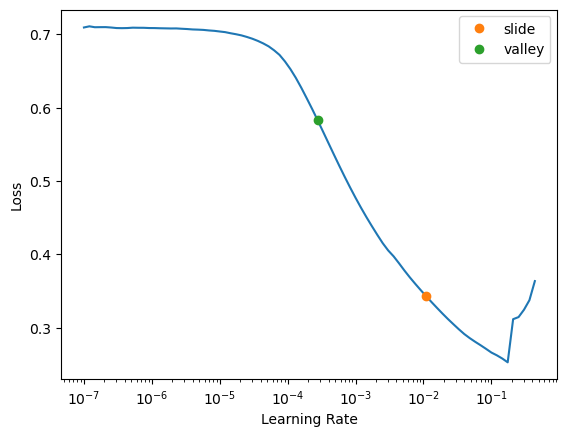

In [8]:
import torch.nn as nn
from torch.nn import BCEWithLogitsLoss
from fastai.vision.all import *
import timm

# Define the CustomHead class with shape inspection
class CustomHead(nn.Module):
    def __init__(self, nf, n_out):
        super().__init__()
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(nf, n_out)

    def forward(self, x):
        if x.dim() == 2:  # No spatial dimensions (1D features per image)
            # print("Input is 2D, skipping pooling.")
            x = self.flatten(x)
        elif x.dim() == 4:  # Regular case: [batch_size, channels, height, width]
            x = self.pool(x)
            # print(f"Shape after pooling: {x.shape}")
            x = self.flatten(x)
        else:
            raise ValueError(f"Unexpected input dimension: {x.dim()} dimensions.")
        # print(f"Shape after flattening: {x.shape}")
        x = self.linear(x)
        return x

# Create the model
# model_name = 'resnet18'  # Replace with your model name
# model_name = 'convnext_tiny'  # Replace with your model name
model_name = 'convnext_large'  # Replace with your model name
the_model = timm.create_model(model_name, pretrained=True, num_classes=0)  # num_classes=0 to exclude the final layer

# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
the_model.to(device)

# Inspect the output shape
x, _ = dls.one_batch()
x = x.to(device)  # Move the input tensor to the same device as the model
with torch.no_grad():
    output = the_model(x)
print(f"Output shape: {output.shape}")

# Extract the number of features
nf = output.shape[1] if output.dim() == 4 else output.shape[-1]  # Handle cases where output is 1D or 4D

# Combine the backbone and custom head
model = nn.Sequential(
    the_model,
    CustomHead(nf=nf, n_out=len(dls.vocab))
)

# Create the learner
learn = Learner(
    dls,
    model,
    loss_func=BCEWithLogitsLoss(),
    metrics=accuracy_multi
).to_bf16()

learn.lr_find(suggest_funcs=(slide, valley))

In [9]:
learn.fine_tune(5, 1e-3)

/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site

/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site

In [10]:
from fastai.vision.all import PILImage
from PIL import Image
import numpy as np

# Debug: Check if learn object is loaded
try:
    print(f"Model loaded: {learn}")
except NameError:
    print("Error: 'learn' object is not defined or not loaded.")

# Debug: Check if dls object is loaded
try:
    print(f"DataLoaders loaded: {dls}")
    print(f"Vocabulary: {dls.vocab}")
except NameError:
    print("Error: 'dls' object is not defined or not loaded.")
except AttributeError:
    print("Error: 'dls' object does not have the expected attributes.")


def perform_prediction(img_path, show_image=True):
    try:
        img = PILImage.create(img_path)
        if show_image: img.show()
        # print("Image loaded successfully.")
        # print(f"Image shape: {img.shape}")
        # print(f"Image type: {type(img)}")
    except Exception as e:
        print(f"Error loading image: {e}")

    # Predict on a new image
    try:
        pred, pred_idx, probs = learn.predict(img)
        probs = sigmoid(probs)
        # print(f"Predicted labels: {pred}")
        # print(f"Prediction indices: {pred_idx}")
        # print(f"Probabilities: {probs}")
    except Exception as e:
        print(f"Error in prediction: {e}")

    # Predict on a new image
    try:
        not_a_pet_idx = list(dls.vocab).index('not-a-pet')
        # print(f"Index of 'not-a-pet' in vocabulary: {not_a_pet_idx}")
    except Exception as e:
        print(f"Error finding 'not-a-pet' in vocabulary: {e}")

    # Set a threshold
    threshold = 0.2
    is_not_pet = probs[not_a_pet_idx] > threshold 

    if is_not_pet:
        return "This is not a pet image."
    else:
        # Find the breed with the highest probability
        # breed_probs = torch.cat((probs[:not_a_pet_idx], probs[not_a_pet_idx+1:]))  # Exclude 'not_a_pet' from breed probabilities
        breed_idx = probs.argmax()
        breed_name = dls.vocab[breed_idx]
        return f"This is a pet image of breed: {breed_name}"

Model loaded: <fastai.learner.Learner object at 0x7f7eb478a590>
DataLoaders loaded: <fastai.data.core.DataLoaders object at 0x7f7fdb19d090>
Vocabulary: ['Abyssinian', 'Affenpinscher', 'Afghan Hound', 'Africanis', 'Airedale Terrier', 'Akbash', 'Akita', 'Aksaray Malaklisi', 'Alano Español', 'Alapaha Blue Blood Bulldog', 'Alaskan Husky', 'Alaskan Klee Kai', 'Alaskan Malamute', 'Alpine Dachsbracke', 'American Bulldog', 'American Bully', 'American Cocker Spaniel', 'American English Coonhound', 'American Foxhound', 'American Hairless Terrier', 'American Pit Bull Terrier', 'American Staffordshire Terrier', 'American Water Spaniel', 'Anglo-Français de Petite Vénerie', 'Appenzeller Sennenhund', 'Ariège Pointer', 'Ariégeois', 'Armenian Gampr', 'Artois Hound', 'Australian Cattle Dog', 'Australian Silky Terrier', 'Australian Stumpy Tail Cattle Dog', 'Austrian Black Hound', 'Austrian Tan Hound', 'Azawakh', 'Bakharwal', 'Banjara Hound', 'Bankhar Dog', 'Barak hound', 'Barbado da Terceira', 'Barbet', 

In [11]:
img_path = Path('images/Basset Hound/0c85043c-8c36-4ee6-983a-74fbb98a66ab.jpg')
print(perform_prediction(img_path))



This is a pet image of breed: Basset Hound


This is not a pet image.


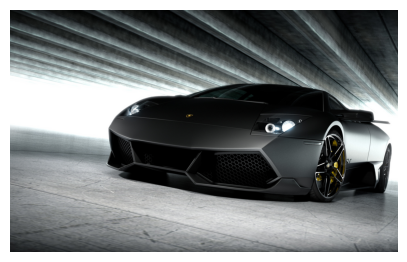

In [12]:
img_path = Path('images/not-a-pet/0a24876d-3891-46be-8240-87d543ae28a3.jpg')
print(perform_prediction(img_path))



This is a pet image of breed: Alaskan Malamute


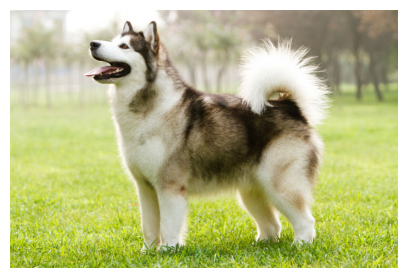

In [13]:
img_path = Path('images/Alaskan Malamute/1fa5011d-5320-4f38-8af1-ede79311f922.jpg')
print(perform_prediction(img_path))

In [14]:
from fastai.vision.all import PILImage
from PIL import Image
import numpy as np

# Debug: Check if learn object is loaded
try:
    print(f"Model loaded: {learn}")
except NameError:
    print("Error: 'learn' object is not defined or not loaded.")

# Debug: Check if dls object is loaded
try:
    print(f"DataLoaders loaded: {dls}")
    print(f"Vocabulary: {dls.vocab}")
except NameError:
    print("Error: 'dls' object is not defined or not loaded.")
except AttributeError:
    print("Error: 'dls' object does not have the expected attributes.")


def perform_prediction2(img_path):
    try:
        img = PILImage.create(img_path)
        img.show()
        # print("Image loaded successfully.")
        # print(f"Image shape: {img.shape}")
        # print(f"Image type: {type(img)}")
    except Exception as e:
        print(f"Error loading image: {e}")

    # Predict on a new image
    try:
        pred, pred_idx, probs = learn.predict(img)
        probs = sigmoid(probs)
        # print(f"Predicted labels: {pred}")
        # print(f"Prediction indices: {pred_idx}")
        # print(f"Probabilities: {probs}")
    except Exception as e:
        print(f"Error in prediction: {e}")

    # Predict on a new image
    try:
        not_a_pet_idx = list(dls.vocab).index('not-a-pet')
        # print(f"Index of 'not-a-pet' in vocabulary: {not_a_pet_idx}")
    except Exception as e:
        print(f"Error finding 'not-a-pet' in vocabulary: {e}")

    # Set a threshold
    threshold = 0.2
    is_not_pet = probs[not_a_pet_idx] > threshold 

    if is_not_pet:
        return "This is not a pet image."
    else:
        # Get the top 5 predictions
        top5_idx = probs.argsort(descending=True)[:5]
        top5_probs = probs[top5_idx]
        top5_breeds = [dls.vocab[i] for i in top5_idx]

        # Format the output
        result = "Top 5 predictions:\n"
        for breed, prob in zip(top5_breeds, top5_probs):
            result += f"{breed}: {prob:.4f}\n"
        
        return result

Model loaded: <fastai.learner.Learner object at 0x7f7eb478a590>
DataLoaders loaded: <fastai.data.core.DataLoaders object at 0x7f7fdb19d090>
Vocabulary: ['Abyssinian', 'Affenpinscher', 'Afghan Hound', 'Africanis', 'Airedale Terrier', 'Akbash', 'Akita', 'Aksaray Malaklisi', 'Alano Español', 'Alapaha Blue Blood Bulldog', 'Alaskan Husky', 'Alaskan Klee Kai', 'Alaskan Malamute', 'Alpine Dachsbracke', 'American Bulldog', 'American Bully', 'American Cocker Spaniel', 'American English Coonhound', 'American Foxhound', 'American Hairless Terrier', 'American Pit Bull Terrier', 'American Staffordshire Terrier', 'American Water Spaniel', 'Anglo-Français de Petite Vénerie', 'Appenzeller Sennenhund', 'Ariège Pointer', 'Ariégeois', 'Armenian Gampr', 'Artois Hound', 'Australian Cattle Dog', 'Australian Silky Terrier', 'Australian Stumpy Tail Cattle Dog', 'Austrian Black Hound', 'Austrian Tan Hound', 'Azawakh', 'Bakharwal', 'Banjara Hound', 'Bankhar Dog', 'Barak hound', 'Barbado da Terceira', 'Barbet', 

Top 5 predictions:
Basset Hound: 0.9621
Basset Artésien Normand: 0.0169
Beagle: 0.0159
Artois Hound: 0.0023
basset_hound: 0.0005



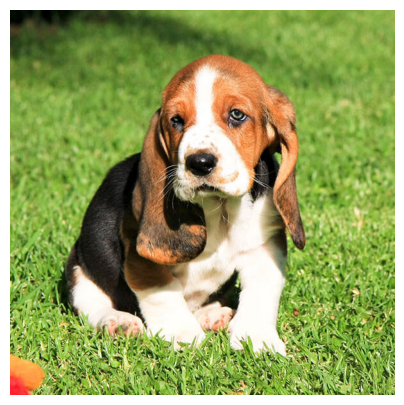

In [15]:
img_path = Path('images/Basset Hound/0c85043c-8c36-4ee6-983a-74fbb98a66ab.jpg')
print(perform_prediction2(img_path))



This is not a pet image.


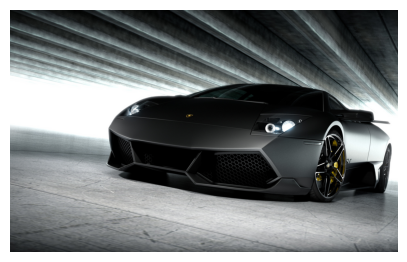

In [16]:
img_path = Path('images/not-a-pet/0a24876d-3891-46be-8240-87d543ae28a3.jpg')
print(perform_prediction2(img_path))


Top 5 predictions:
Alaskan Malamute: 0.9679
Alaskan Husky: 0.1551
Canadian Eskimo Dog: 0.0019
Akita: 0.0008
Alaskan Klee Kai: 0.0007



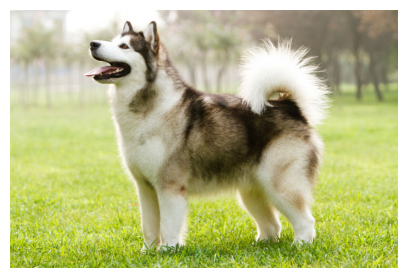

In [17]:
img_path = Path('images/Alaskan Malamute/1fa5011d-5320-4f38-8af1-ede79311f922.jpg')
print(perform_prediction2(img_path))

In [18]:
validation_path = Path('images')

#get list of folder names
folders = [f for f in validation_path.ls() if f.is_dir()]

results = []
#iterate through each folder
for folder in folders:
    # print(f"Folder: {folder.name}")
    #get 5 random images from the folder
    all_files = folder.ls()
    
    # Filter the list to include only .jpg files
    jpg_files = L([file for file in all_files if file.suffix.lower() == '.jpg'])

    # Shuffle the filtered list and select the first 5 images
    images = jpg_files.shuffle()[:5]

    for img_path in images:
        result = perform_prediction(img_path, show_image=False)
        #check that folder.name is in the result using lower case
        is_correct = folder.name.lower() in result.lower()
        
        # place the results in a dataset to view later
        results.append({
            'Folder': folder.name,
            'Image': img_path.name,
            'Result': result,
            'Correct': is_correct
        })        
        
        # print(f"Image: {img_path.name}, Result: {result}, Correct: {is_correct}")
    
print("Validation complete.")
print(len(results))
        
# Convert the list of results to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)

Validation complete.
585


Folder                                     Image  \
0    Affenpinscher  ff4f3053-8157-41a4-b251-4a7e427e19fd.jpg   
1    Affenpinscher  41d4e57c-ab28-4702-80d1-dfb9c20a14aa.jpg   
2    Affenpinscher  8b99b1d2-3e24-4776-ad1c-59e97bc65492.jpg   
3    Affenpinscher  72687e7c-7968-4b87-962b-c259ba0d9aa2.jpg   
4    Affenpinscher  a61aaa37-f1b1-4f43-aaa0-821987b46165.jpg   
..             ...                                       ...   
580      not-a-pet  ea27e0d2-8fc4-47f1-83df-1cf1268eb074.jpg   
581      not-a-pet  5d532fe7-038e-472e-ae7e-1240dc610007.jpg   
582      not-a-pet  60c5206b-9f9b-4bc9-8cca-318143ebdf95.jpg   
583      not-a-pet  aae83dfc-4ca0-403e-8a55-fd7c41d23ac8.jpg   
584      not-a-pet  0c0902fd-fd0e-48be-986d-85ea7f6d55a2.jpg   

                                          Result  Correct  
0    This is a pet image of breed: Affenpinscher     True  
1    This is a pet image of breed: Affenpinscher     True  
2    This is a pet image of breed: Affenpinscher     True  
3    This is a pet image of breed: Affenpinscher     True  
4    This is a pet image of breed: Affenpinscher     True  
..                                           ...      ...  
580                     This is not a pet image.    False  
581                     This is not a pet image.    False  
582                     This is not a pet image.    False  
583                     This is not a pet image.    False  
584                     This is not a pet image.    False  

[585 rows x 4 columns]

In [19]:
import pandas as pd
from IPython.display import display, HTML

# Assuming results_df is your DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Add CSS and JavaScript for DataTables
display(HTML('''
<link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.10.21/css/jquery.dataTables.css">
<script type="text/javascript" charset="utf8" src="https://code.jquery.com/jquery-3.5.1.js"></script>
<script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/1.10.21/js/jquery.dataTables.js"></script>
<script>
$(document).ready(function() {
    $('#results_table').DataTable();
});
</script>
'''))

# print a summary with the no of correct predictions
correct = results_df['Correct'].sum()
total = len(results_df)
accuracy = correct / total
print(f"{model_name} => Correct predictions: {correct} / {total} ({accuracy:.2%})")

# Display the DataFrame
display(HTML(results_df.to_html(classes='table table-striped table-bordered', table_id='results_table')))

convnext_large => Correct predictions: 537 / 585 (91.79%)


In [20]:
import pandas as pd
from IPython.display import display, HTML, Javascript

# Assuming results_df is your DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Add CSS and JavaScript for DataTables
display(HTML('''
<link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.10.21/css/jquery.dataTables.css">
<script type="text/javascript" charset="utf8" src="https://code.jquery.com/jquery-3.5.1.js"></script>
<script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/1.10.21/js/jquery.dataTables.js"></script>
'''))

# Display the DataFrame
display(HTML(results_df.to_html(classes='table table-striped table-bordered', table_id='results_table')))

# Use IPython.display.Javascript to execute the script
display(Javascript('''
    $(document).ready(function() {
        $('#results_table').DataTable();
    });
'''))


<IPython.core.display.Javascript object>